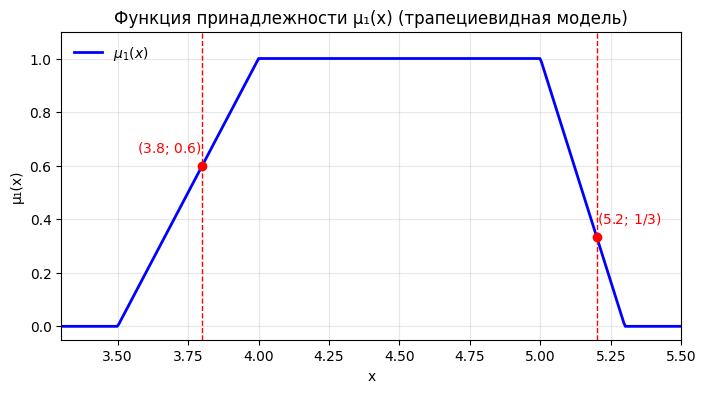

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mu1(x):
    if 3.5 < x <= 4:
        return 2 * x - 7
    elif 4 < x <= 5:
        return 1
    elif 5 < x <= 5.3:
        return -(10/3) * x + 53/3
    else:
        return 0

x_vals = np.linspace(3.3, 5.5, 400)
mu_vals = np.array([mu1(x) for x in x_vals])

points_x = [3.8, 5.2]
points_y = [mu1(3.8), mu1(5.2)]

plt.figure(figsize=(8,4))
plt.plot(x_vals, mu_vals, linewidth=2, label=r'$\mu_1(x)$', color='blue')
plt.scatter(points_x, points_y, color='red', zorder=5)

for x in points_x:
    plt.axvline(x, color='red', linestyle='--', linewidth=1)

plt.text(3.8, mu1(3.8)+0.05, r'$(3.8;\,0.6)$', color='red', ha='right', fontsize=10)
plt.text(5.2, mu1(5.2)+0.05, r'$(5.2;\,1/3)$', color='red', ha='left', fontsize=10)

plt.title("Функция принадлежности μ₁(x) (трапециевидная модель)")
plt.xlabel("x")
plt.ylabel("μ₁(x)")
plt.grid(alpha=0.3)
plt.ylim(-0.05, 1.1)
plt.xlim(3.3, 5.5)
plt.legend(frameon=False)
plt.show()


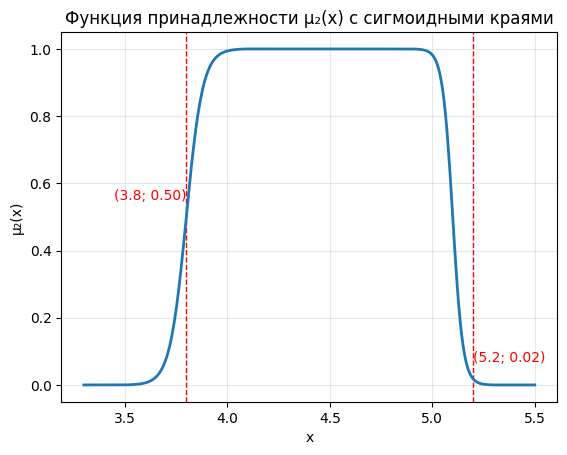

In [3]:
import numpy as np
import matplotlib.pyplot as plt

k1 = 25
k2 = 40
left_bound  = 4.1
right_bound = 4.9
c_left  = (left_bound + 3.5) / 2
c_right = (right_bound + 5.3) / 2

def sigmoid_section(x, a, b, c, k):
    """
    Возвращает нормированную сигмоиду на интервале [a, b]:
    0 при x=a, 1 при x=b.
    """
    f = lambda t: 1 / (1 + np.exp(-k * (t - c)))
    num = f(x) - f(a)
    den = f(b) - f(a)
    return np.clip(num / den, 0, 1)

def mu2(x):
    if x <= 3.5:
        return 0.0
    elif 3.5 < x <= left_bound:
        return sigmoid_section(x, 3.5, left_bound,  c_left,  k1)
    elif left_bound < x <= right_bound:
        return 1.0
    elif right_bound < x <= 5.3:
        return 1 - sigmoid_section(x, right_bound, 5.3, c_right, k2)
    else:
        return 0.0

points_x = [3.8, 5.2]
points_y = [mu2(3.8), mu2(5.2)]


x_vals = np.linspace(3.3, 5.5, 400)
mu_vals = np.array([mu2(x) for x in x_vals])

for x in points_x:
    plt.axvline(x, color='red', linestyle='--', linewidth=1)


plt.text(3.8, mu2(3.8)+0.05, f"(3.8; {mu2(3.8):.2f})", color='red', ha='right', fontsize=10)
plt.text(5.2, mu2(5.2)+0.05, f"(5.2; {mu2(5.2):.2f})", color='red', ha='left', fontsize=10)

plt.plot(x_vals, mu_vals, linewidth=2)
plt.title("Функция принадлежности μ₂(x) с сигмоидными краями")
plt.xlabel("x")
plt.ylabel("μ₂(x)")
plt.grid(alpha=0.3)
plt.ylim(-0.05, 1.05)
plt.show()


In [4]:
import numpy as np

sigma = 0.05

def I_trapz(x0, n=200):
    """
    Среднее значение функции μ₂(x) на окрестности [x0-σ, x0+σ],
    вычисленное методом трапеций.
    """
    xs = np.linspace(x0 - sigma, x0 + sigma, n)
    ys = np.array([mu2(x) for x in xs])
    area = np.trapz(ys, xs)
    return area / (2 * sigma)

I_38 = I_trapz(3.8)
I_52 = I_trapz(5.2)

print(f"I(3.8) ≈ {I_38:.4f}")
print(f"I(5.2) ≈ {I_52:.4f}")


I(3.8) ≈ 0.5000
I(5.2) ≈ 0.0308


/tmp/ipython-input-722675689.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(ys, xs)


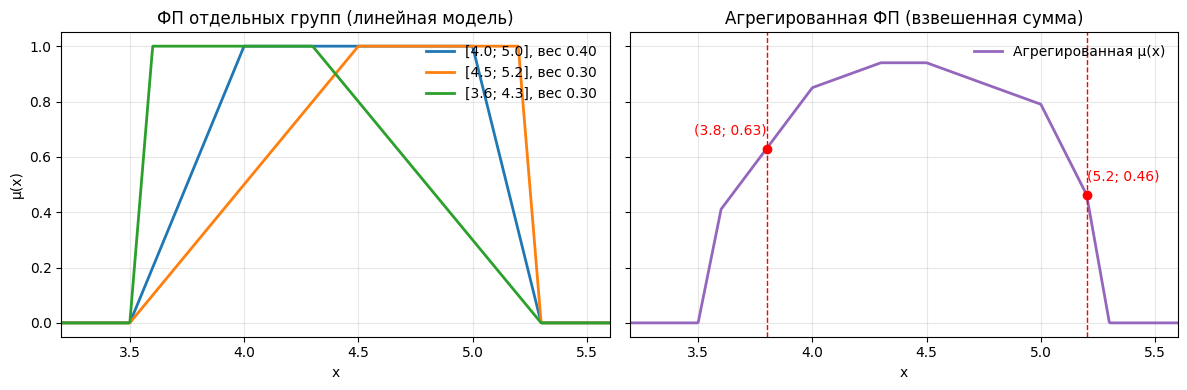

In [5]:
import numpy as np
import matplotlib.pyplot as plt

lo, hi = 3.5, 5.3

groups = [
    (0.40, 4.0, 5.0),   # 40%: 4 ≤ D ≤ 5
    (0.30, 4.5, 5.2),   # 30%: 4.5 ≤ D ≤ 5.2
    (0.30, 3.6, 4.3),   # 30%: 3.6 ≤ D ≤ 4.3
]


def mu_interval(x, a, b, lo=lo, hi=hi):
    if x <= lo or x >= hi:
        return 0.0
    if lo < x <= a:
        return (x - lo) / (a - lo)
    if a < x <= b:
        return 1.0
    if b < x < hi:
        return (hi - x) / (hi - b)
    return 0.0

x = np.linspace(3.2, 5.6, 600)
mus = []
for (w, a, b) in [(w,a,b) for (w,a,b) in groups]:
    mu_g = np.array([mu_interval(xi, a, b) for xi in x])
    mus.append((w, a, b, mu_g))

mu_agg = sum(w * mu_g for (w, a, b, mu_g) in mus)

x_marks = [3.8, 5.2]
y_marks = [np.interp(xm, x, mu_agg) for xm in x_marks]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

colors = ['tab:blue', 'tab:orange', 'tab:green']
for color, (w, a, b, mu_g) in zip(colors, mus):
    ax1.plot(x, mu_g, color=color, linewidth=2,
             label=fr'[{a}; {b}], вес {w:.2f}')
ax1.set_title("ФП отдельных групп (линейная модель)")
ax1.set_xlabel("x")
ax1.set_ylabel("μ(x)")
ax1.set_xlim(3.2, 5.6); ax1.set_ylim(-0.05, 1.05)
ax1.grid(alpha=0.3)
ax1.legend(frameon=False, loc="upper right")

ax2.plot(x, mu_agg, color='tab:purple', linewidth=2, label="Агрегированная μ(x)")

for xm in x_marks:
    ax2.axvline(xm, color='red', linestyle='--', linewidth=1)

ax2.scatter(x_marks, y_marks, color='red', zorder=5)
ax2.text(x_marks[0], y_marks[0] + 0.05, fr'({x_marks[0]:.1f}; {y_marks[0]:.2f})',
         color='red', ha='right', fontsize=10)
ax2.text(x_marks[1], y_marks[1] + 0.05, fr'({x_marks[1]:.1f}; {y_marks[1]:.2f})',
         color='red', ha='left', fontsize=10)

ax2.set_title("Агрегированная ФП (взвешенная сумма)")
ax2.set_xlabel("x")
ax2.set_xlim(3.2, 5.6); ax2.set_ylim(-0.05, 1.05)
ax2.grid(alpha=0.3)
ax2.legend(frameon=False, loc="upper right")

plt.tight_layout()
plt.show()


In [6]:
import numpy as np

sigma = 0.05

from scipy.interpolate import interp1d
mu_agg_func = interp1d(x, mu_agg, kind='linear', bounds_error=False, fill_value=0.0)

def I_trapz(x0, n=200):
    """
    Среднее значение агрегированной функции μ(x) на окрестности [x0-σ, x0+σ],
    вычисленное методом трапеций.
    """
    xs = np.linspace(x0 - sigma, x0 + sigma, n)
    ys = mu_agg_func(xs)
    area = np.trapz(ys, xs)
    return area / (2 * sigma)

I_38 = I_trapz(3.8)
I_52 = I_trapz(5.2)

print(f"I(3.8) ≈ {I_38:.4f}")
print(f"I(5.2) ≈ {I_52:.4f}")


I(3.8) ≈ 0.6300
I(5.2) ≈ 0.4258


/tmp/ipython-input-3617762123.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(ys, xs)


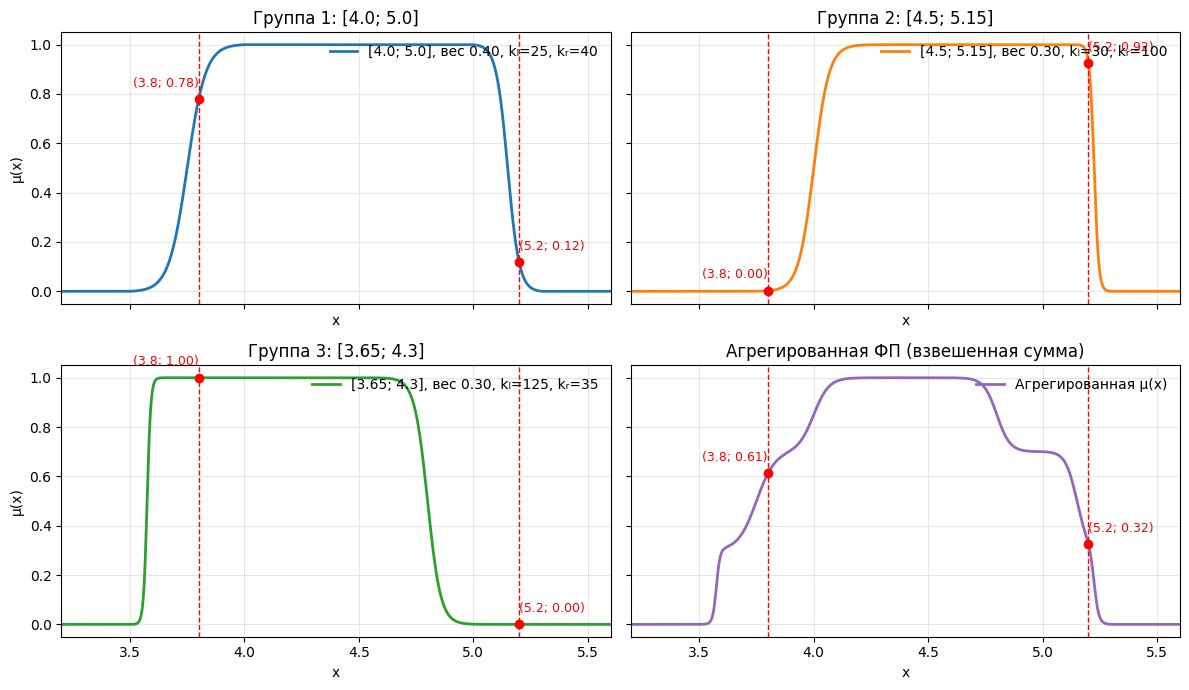

In [7]:
import numpy as np
import matplotlib.pyplot as plt

lo, hi = 3.5, 5.3
x = np.linspace(3.2, 5.6, 800)

# Сигмоидные параметры для каждой экспертной ФП
# (вес, a, b, k_left, k_right, c_left, c_right)
sigmoid_params = [
    # группа 1 (40%): 4 ≤ D ≤ 5
    (0.40, 4.0, 5.0, 25, 40, (3.5 + 4.0) / 2, (5.0 + 5.3) / 2),
    # группа 2 (30%): 4.5 ≤ D ≤ 5.2
    # (0.30, 4.5, 5.2, 30, 50, (3.5 + 4.5) / 2, (5.2 + 5.3) / 2),
    (0.30, 4.5, 5.15, 30, 100, (3.5 + 4.5) / 2, (5.15 + 5.3) / 2),
    # группа 3 (30%): 3.6 ≤ D ≤ 4.3
    (0.30, 3.65, 4.3, 125, 35, (3.5 + 3.65) / 2, (4.3 + 5.3) / 2),
]

def sigmoid_section(x, a, b, c, k):
    """
    Возвращает нормированную сигмоиду на интервале [a, b]:
    0 при x=a, 1 при x=b.
    """
    f = lambda t: 1.0 / (1.0 + np.exp(-k * (t - c)))
    num = f(x) - f(a)
    den = f(b) - f(a)
    return np.clip(num / den, 0.0, 1.0)


def mu_sigmoid_interval(x, a, b, lo, hi, kL, kR, cL, cR):
    if x <= lo or x >= hi:
        return 0.0
    if lo < x <= a:
        return sigmoid_section(x, lo, a, cL, kL)
    if a < x <= b:
        return 1.0
    if b < x < hi:
        return 1.0 - sigmoid_section(x, b, hi, cR, kR)
    return 0.0


mus = []
for (w, a, b, kL, kR, cL, cR) in sigmoid_params:
    mu_g = np.array([mu_sigmoid_interval(xi, a, b, lo, hi, kL, kR, cL, cR) for xi in x])
    mus.append((w, a, b, kL, kR, mu_g))


mu_agg = sum(w * mu_g for (w, a, b, kL, kR, mu_g) in mus)


x_marks = [3.8, 5.2]
interp = lambda arr, xm: np.interp(xm, x, arr)


fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True, sharey=True)
axes = axes.ravel()
colors = ['tab:blue', 'tab:orange', 'tab:green']

for i, (ax, color, (w, a, b, kL, kR, mu_g)) in enumerate(zip(axes[:3], colors, mus), start=1):
    ax.plot(x, mu_g, color=color, linewidth=2,
            label=fr'[{a}; {b}], вес {w:.2f}, kₗ={kL}, kᵣ={kR}')
    for xm in x_marks:
        ax.axvline(xm, color='red', linestyle='--', linewidth=1)
        y = interp(mu_g, xm)
        ax.scatter(xm, y, color='red', zorder=5)
        ax.text(xm, y + 0.05, fr'({xm:.1f}; {y:.2f})',
                color='red', fontsize=9, ha='right' if xm < 4.5 else 'left')

    ax.set_title(fr"Группа {i}: [{a}; {b}]")
    ax.grid(alpha=0.3)
    ax.legend(frameon=False, loc="upper right")


ax = axes[3]
ax.plot(x, mu_agg, color='tab:purple', linewidth=2, label="Агрегированная μ(x)")
for xm in x_marks:
    ax.axvline(xm, color='red', linestyle='--', linewidth=1)
    y = interp(mu_agg, xm)
    ax.scatter(xm, y, color='red', zorder=5)
    ax.text(xm, y + 0.05, fr'({xm:.1f}; {y:.2f})',
            color='red', fontsize=9, ha='right' if xm < 4.5 else 'left')

ax.set_title("Агрегированная ФП (взвешенная сумма)")
ax.grid(alpha=0.3)
ax.legend(frameon=False, loc="upper right")


for ax in axes:
    ax.set_xlim(3.2, 5.6)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlabel("x")
axes[0].set_ylabel("μ(x)")
axes[2].set_ylabel("μ(x)")

plt.tight_layout()
plt.show()


In [ ]:
# === Вычисление средних значений (локальное усреднение на окне) ===
# Предполагается, что у тебя уже есть:
#   x        — общая сетка (np.ndarray)
#   mus      — список по группам: (w, a, b, kL, kR, mu_g), где mu_g — значения ФП на x
#   mu_agg   — агрегированная ФП на той же сетке x
# Если нет points_x — раскомментируй следующую строку:
# points_x = [3.8, 5.2]

sigma = 0.05  # половина окна усреднения (т.е. окно [x0 - sigma, x0 + sigma])

def local_mean_on_window(xgrid, ygrid, x0, sigma=0.05, n=801):
    """
    Среднее значение функции на окне [x0 - sigma, x0 + sigma],
    численно: трапец. формула + нормировка на длину окна.
    """
    xs = np.linspace(x0 - sigma, x0 + sigma, n)
    ys = np.interp(xs, xgrid, ygrid, left=0.0, right=0.0)
    area = np.trapz(ys, xs)
    return area / (2 * sigma)

# --- Расчёт для агрегированной функции ---
print("=== Средние значения на окнах (агрегированная ФП) ===")
agg_vals = [local_mean_on_window(x, mu_agg, xm, sigma) for xm in points_x]
agg_inst = [np.interp(xm, x, mu_agg) for xm in points_x]
for xm, mval, iv in zip(points_x, agg_vals, agg_inst):
    print(f"  I_agg({xm:.1f}) ≈ {mval:.4f}")


=== Средние значения на окнах (агрегированная ФП) ===
  I_agg(3.8) ≈ 0.6031
  I_agg(5.2) ≈ 0.2896


/tmp/ipython-input-4090008263.py:18: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(ys, xs)
